In [7]:
import yaml
import pandas as pd
import time
import joblib
from backend.utils.data_preprocessor import DataPreprocessor
from sklearn.preprocessing import MinMaxScaler
import numpy as np

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

interval: str = "1min"

training_file_path: str = f"../data/twelvedata/feature time series ({interval})/AAPL_feature_time_series.csv"
validation_file_path: str = f"../data/twelvedata/feature time series ({interval})/ABBV_feature_time_series.csv"

start_time = time.time()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

training_df = pd.read_csv(training_file_path)
validation_df = pd.read_csv(validation_file_path)

for column in training_df.columns:

    numeric_column = pd.to_numeric(training_df[column], errors='coerce')
    has_infinity = np.isinf(numeric_column).any()
    if has_infinity:
        print(column, "The column contains infinity values.")

    has_zero = (training_df[column] == 'NaN').any()

    if has_zero:
        print(column, "The column contains NaN values.")


In [8]:
lookback_period: int = config['preprocess']['lookback_period']
target: str = config['preprocess']['target']
trend_length: int = config['preprocess']['trend_length']
training_preprocessor = DataPreprocessor(time_series=training_df, lookback_period=lookback_period, target=target, trend_length=trend_length)
validation_preprocessor = DataPreprocessor(time_series=validation_df, lookback_period=lookback_period, target=target, trend_length=trend_length)

X_train = training_preprocessor.feature_data_batched
y_train = training_preprocessor.label_data

X_val = validation_preprocessor.feature_data_batched
y_val = validation_preprocessor.label_data

training_preprocessor.target_data.head(500)

,open,open_1 change,open_9 change,open_1 change(%),open_9 change(%),open_1 trend,open_9 trend,high,low,close,sma,sma slope,ema,ema slope,percent_b,rsi,adx,day,hour,target trend,label
datetime,,,,,,,,,,,,,,,,,,,,,
2024-10-25 11:11:00,232.84,0.04,-0.26,0.0172,-0.1115,1,0,232.91,232.74,232.76,232.94,-0.00,232.89,-0.00,0.27,47.88,13.77,4,11,0,0
2024-10-25 11:12:00,232.74,-0.10,-0.17,-0.0429,-0.0730,0,0,232.89,232.74,232.88,232.94,-0.00,232.89,-0.00,0.48,53.77,13.08,4,11,0,0
2024-10-25 11:13:00,232.89,0.15,-0.05,0.0644,-0.0215,1,0,233.00,232.85,233.00,232.94,0.00,232.91,0.00,0.70,58.79,12.62,4,11,0,0
2024-10-25 11:14:00,232.97,0.08,0.02,0.0344,0.0086,1,1,232.99,232.91,232.97,232.93,-0.00,232.92,0.00,0.63,57.12,12.20,4,11,0,0
2024-10-25 11:15:00,232.98,0.01,-0.08,0.0043,-0.0343,1,0,232.98,232.90,232.95,232.91,-0.00,232.93,0.00,0.57,55.98,11.72,4,11,0,0
2024-10-25 11:16:00,232.93,-0.05,-0.19,-0.0215,-0.0815,0,0,232.98,232.90,232.93,232.90,-0.00,232.93,0.00,0.51,54.80,11.28,4,11,0,0
2024-10-25 11:17:00,232.91,-0.02,-0.17,-0.0086,-0.0729,0,0,232.91,232.84,232.87,232.89,-0.00,232.92,-0.00,0.33,51.31,10.60,4,11,0,1
2024-10-25 11:18:00,232.93,0.02,-0.01,0.0086,-0.0043,1,0,232.96,232.91,232.92,232.90,0.00,232.92,0.00,0.44,53.94,10.14,4,11,1,1
2024-10-25 11:19:00,232.95,0.02,0.15,0.0086,0.0644,1,1,232.95,232.95,232.95,232.91,0.00,232.92,0.00,0.51,55.50,9.72,4,11,1,1


In [9]:
X_train = X_train[:-training_preprocessor.trend_length]
y_train = y_train[:-training_preprocessor.trend_length]

X_val = X_val[:-validation_preprocessor.trend_length]
y_val = y_val[:-validation_preprocessor.trend_length]

X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_val_reshaped = X_val.reshape(-1, X_val.shape[-1])

end_time = time.time()
loading_time = end_time - start_time

print("Loading time: ", loading_time)
print("Training Dataset shape:", training_df.shape)
print("Validation Dataset shape:", validation_df.shape)
print("Training sets shape:", X_train.shape, y_train.shape)
print("Validation sets shape:", X_val.shape, y_val.shape)


Loading time:  1.5758399963378906
Training Dataset shape: (4970, 20)
Validation Dataset shape: (4970, 20)
Training sets shape: (4965, 3, 20) (4965,)
Validation sets shape: (4965, 3, 20) (4965,)


In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_filename: str = "scaler.save"
X_train_scaled_reshaped = scaler.fit_transform(X_train_reshaped)
X_val_scaled_reshaped = scaler.transform(X_val_reshaped)

joblib.dump(scaler, scaler_filename)

X_train_scaled = X_train_scaled_reshaped.reshape(X_train.shape)
X_val_scaled = X_val_scaled_reshaped.reshape(X_val.shape)

In [11]:
from backend.models.stock_trend_lstm_model import StockTrendLSTMModel

input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])
epochs: int = config["model"]["epochs"]
batch_size: int = config["model"]["batch_size"]
my_model = StockTrendLSTMModel(input_shape, X_train_scaled, y_train, X_val_scaled, y_val, epochs, batch_size)
history = my_model.train()

Total number of weights in the model: 1761
Epoch 1/100
1242/1242 [==============================] - 16s 9ms/step - loss: 0.5837 - accuracy: 0.7148 - val_loss: 0.7265 - val_accuracy: 0.4095
Epoch 2/100
1242/1242 [==============================] - 9s 8ms/step - loss: 0.5004 - accuracy: 0.7609 - val_loss: 0.6948 - val_accuracy: 0.4101
Epoch 3/100
1242/1242 [==============================] - 9s 8ms/step - loss: 0.4661 - accuracy: 0.7875 - val_loss: 0.6814 - val_accuracy: 0.4437
Epoch 4/100
1242/1242 [==============================] - 9s 8ms/step - loss: 0.4369 - accuracy: 0.8109 - val_loss: 0.6929 - val_accuracy: 0.4097
Epoch 5/100
1242/1242 [==============================] - 9s 8ms/step - loss: 0.4233 - accuracy: 0.8216 - val_loss: 0.6856 - val_accuracy: 0.4173
Epoch 6/100
1242/1242 [==============================] - 9s 8ms/step - loss: 0.4149 - accuracy: 0.8238 - val_loss: 0.6829 - val_accuracy: 0.4207
Epoch 7/100
1242/1242 [==============================] - 9s 8ms/step - loss: 0.4158 - 

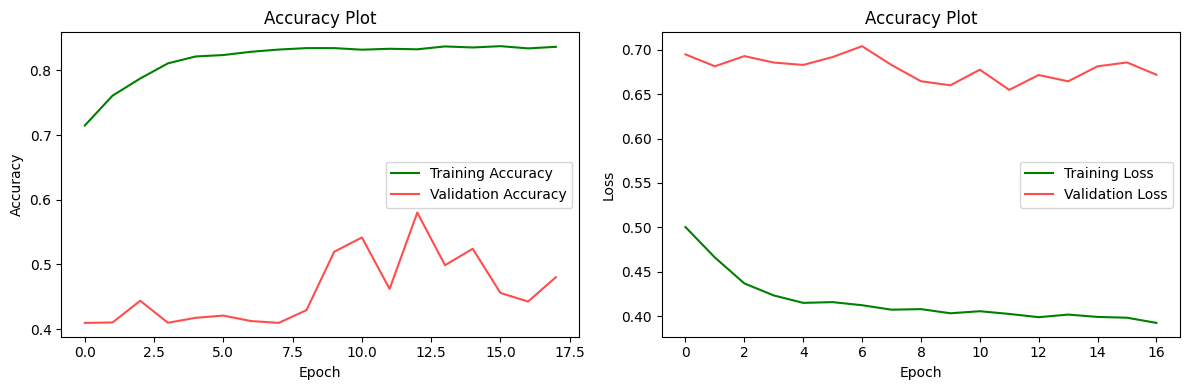

In [12]:
from backend.utils.visualizing_service import plot_model_accuracy
plot_model_accuracy(history)